<a href="https://colab.research.google.com/github/ADRIANATORREZANI/ADRIANATORREZANI/blob/main/Projeto_Predi%C3%A7%C3%A3o_de_Qualidade_de_Vinhos_Adriana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRIMEIRA TENTATIVA

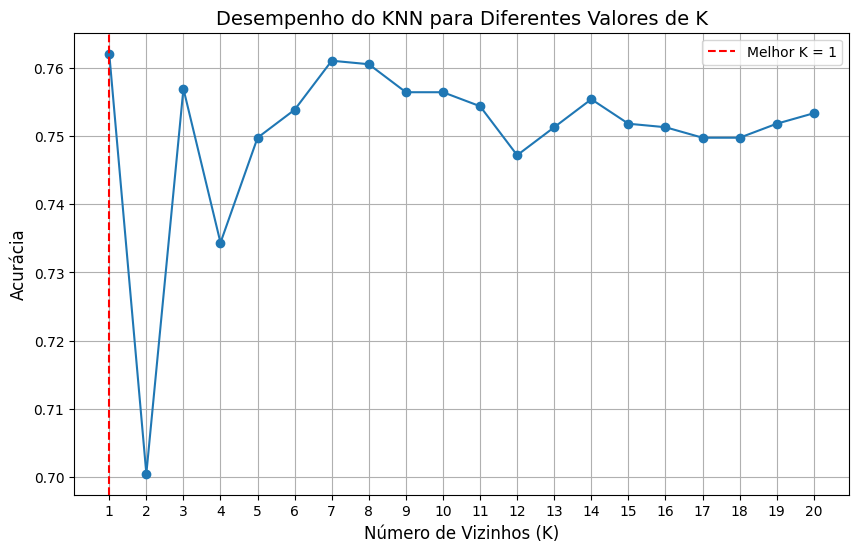

Melhor valor de K: 1 com acurácia de 76.21%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       691
           1       0.83      0.80      0.81      1259

    accuracy                           0.76      1950
   macro avg       0.74      0.75      0.74      1950
weighted avg       0.77      0.76      0.76      1950



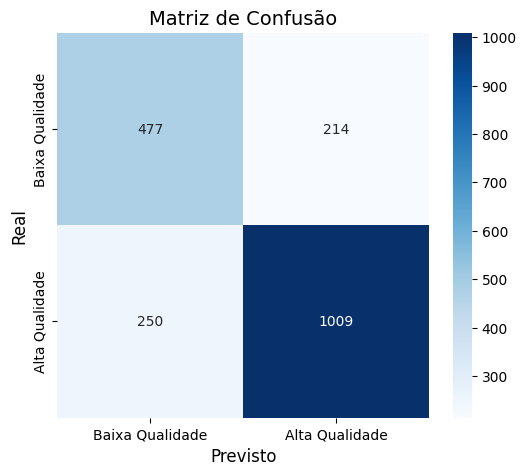

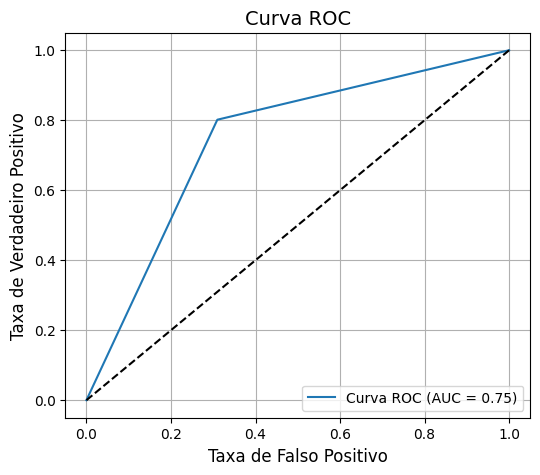


🔍 Análise das Características Mais Influentes:


<ipython-input-13-6bb3372a60f8>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diferença Média', y='Característica', data=importancia_caracteristicas, palette='viridis')


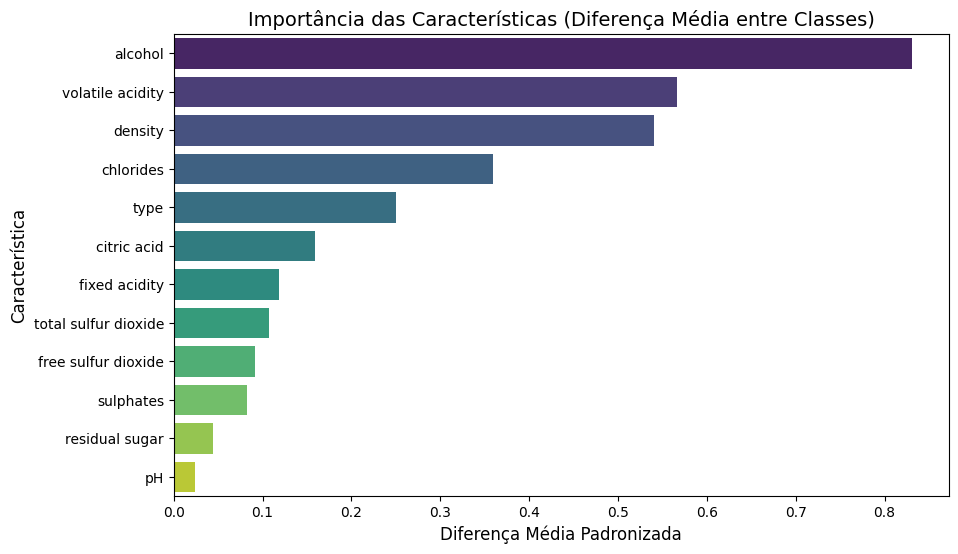


Tabela de Importância:
      Característica  Diferença Média
             alcohol         0.830530
    volatile acidity         0.566300
             density         0.540241
           chlorides         0.358941
                type         0.249755
         citric acid         0.159269
       fixed acidity         0.118795
total sulfur dioxide         0.106949
 free sulfur dioxide         0.091103
           sulphates         0.082869
      residual sugar         0.044230
                  pH         0.024310


In [ ]:
import pandas as pd
import numpy as np  # Importação adicionada aqui
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# 1. Carregar e preparar os dados dos vinhos
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

red_wine['type'] = 'red'
white_wine['type'] = 'white'
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)
wine_data['type'] = wine_data['type'].map({'red': 0, 'white': 1})

# Criar variável target binária (1 para qualidade >=6, 0 caso contrário)
wine_data['qualidade_binaria'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# 2. Separar variáveis
X = wine_data.drop(['quality', 'qualidade_binaria'], axis=1)
y = wine_data['qualidade_binaria']

# 3. Dividir e normalizar os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Encontrar o melhor K
k_values = range(1, 21)
scores = []

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train_scaled, y_train)
    scores.append(modelo.score(X_test_scaled, y_test))

melhor_k = k_values[np.argmax(scores)]
melhor_score = max(scores)

# 5. Gráfico de desempenho
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.title('Desempenho do KNN para Diferentes Valores de K', fontsize=14)
plt.xlabel('Número de Vizinhos (K)', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.axvline(melhor_k, color='r', linestyle='--', label=f'Melhor K = {melhor_k}')
plt.legend()
plt.show()

print(f"Melhor valor de K: {melhor_k} com acurácia de {melhor_score:.2%}")

# 6. Modelo final e avaliação
modelo_final = KNeighborsClassifier(n_neighbors=melhor_k)
modelo_final.fit(X_train_scaled, y_train)
y_pred = modelo_final.predict(X_test_scaled)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# 7. Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Baixa Qualidade', 'Alta Qualidade'],
            yticklabels=['Baixa Qualidade', 'Alta Qualidade'])
plt.title('Matriz de Confusão', fontsize=14)
plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

# 8. Curva ROC
y_proba = modelo_final.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo', fontsize=12)
plt.ylabel('Taxa de Verdadeiro Positivo', fontsize=12)
plt.title('Curva ROC', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 9. Análise de importância das características (método adaptado para KNN)
print("\n🔍 Análise das Características Mais Influentes:")

# Calculando a diferença média entre classes para cada característica
diferencas_medias = []
for i in range(X_train_scaled.shape[1]):
    media_classe1 = np.mean(X_train_scaled[y_train == 1, i])
    media_classe0 = np.mean(X_train_scaled[y_train == 0, i])
    diferencas_medias.append(abs(media_classe1 - media_classe0))

# Criando DataFrame com os resultados
importancia_caracteristicas = pd.DataFrame({
    'Característica': X.columns,
    'Diferença Média': diferencas_medias
}).sort_values('Diferença Média', ascending=False)

# Visualização gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x='Diferença Média', y='Característica', data=importancia_caracteristicas, palette='viridis')
plt.title('Importância das Características (Diferença Média entre Classes)', fontsize=14)
plt.xlabel('Diferença Média Padronizada', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.show()

print("\nTabela de Importância:")
print(importancia_caracteristicas.to_string(index=False))

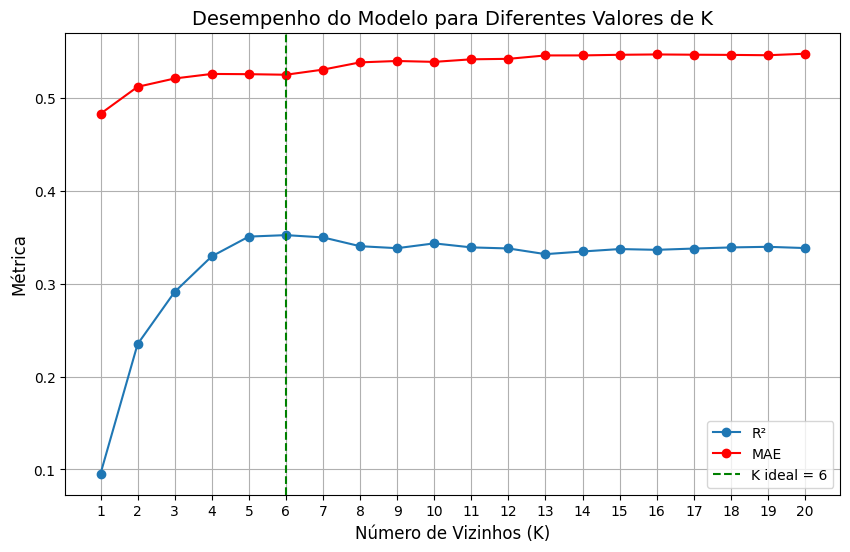


✅ O número ideal de vizinhos foi K = 6 com:
R² = 0.352
MAE = 0.525

📊 Métricas Finais do Modelo:
MAE (Erro Absoluto Médio): 0.525
MSE (Erro Quadrático Médio): 0.473
RMSE (Raiz do Erro Quadrático Médio): 0.688
R² (Coeficiente de Determinação): 0.352


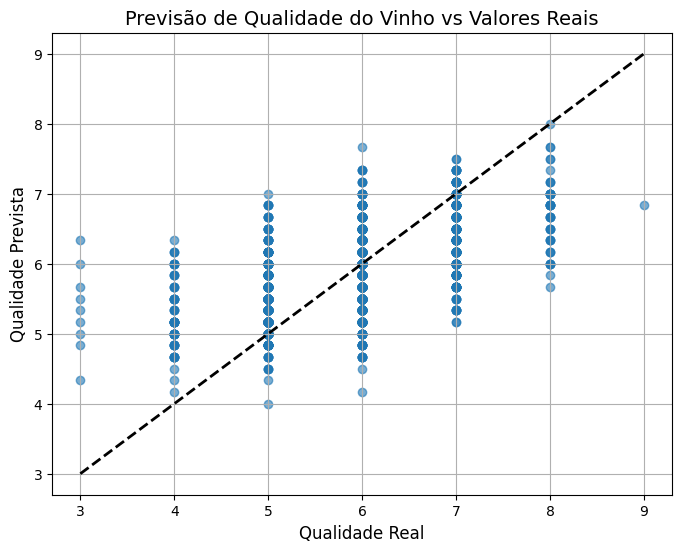

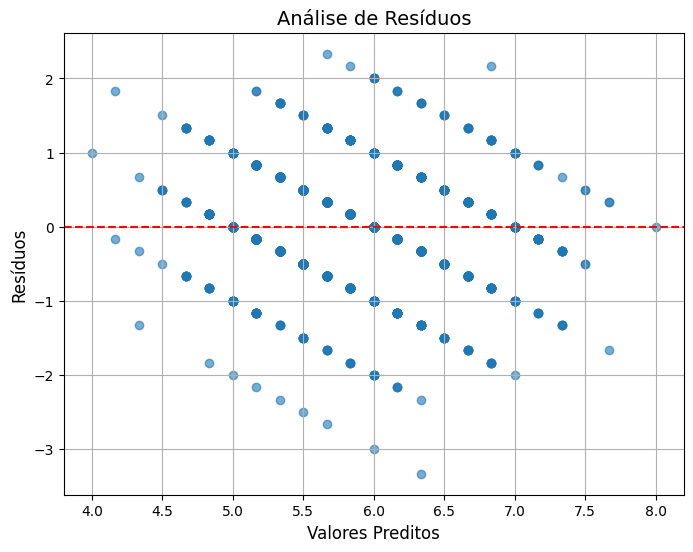


🔍 Análise das Características Mais Importantes:


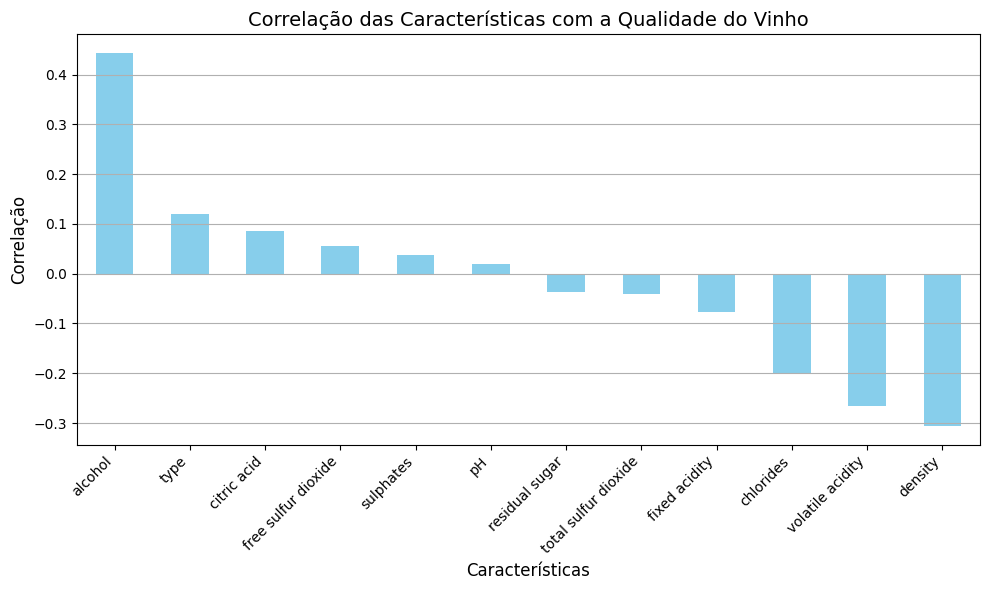


Correlações com a Qualidade:
alcohol                 0.444319
type                    0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Carregar e preparar os dados dos vinhos
# Carregar datasets
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Adicionar coluna de tipo
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combinar datasets
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Codificar tipo como numérico
wine_data['type'] = wine_data['type'].map({'red': 0, 'white': 1})

# 2. Separar variáveis
X = wine_data.drop('quality', axis=1)  # Todas as features exceto a qualidade
y = wine_data['quality']  # Variável target (nota de qualidade)

# 3. Dividir em treino e teste (com normalização)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados (importante para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Testar vários valores de K
k_values = range(1, 21)  # Testando mais valores pois temos mais dados
scores_r2 = []
scores_mae = []

for k in k_values:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    scores_r2.append(r2_score(y_test, y_pred))
    scores_mae.append(mean_absolute_error(y_test, y_pred))

# 5. Encontrar K ideal (baseado no R²)
melhor_k = k_values[np.argmax(scores_r2)]
melhor_r2 = max(scores_r2)
melhor_mae = scores_mae[np.argmax(scores_r2)]

# 6. Plotar desempenho
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_r2, marker='o', label='R²')
plt.plot(k_values, scores_mae, marker='o', color='red', label='MAE')
plt.title('Desempenho do Modelo para Diferentes Valores de K', fontsize=14)
plt.xlabel('Número de Vizinhos (K)', fontsize=12)
plt.ylabel('Métrica', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.axvline(melhor_k, color='green', linestyle='--', label=f'K ideal = {melhor_k}')
plt.legend()
plt.show()

print(f"\n✅ O número ideal de vizinhos foi K = {melhor_k} com:")
print(f"R² = {melhor_r2:.3f}")
print(f"MAE = {melhor_mae:.3f}")

# 7. Treinar modelo final com K ideal
modelo_final = KNeighborsRegressor(n_neighbors=melhor_k)
modelo_final.fit(X_train_scaled, y_train)
y_pred = modelo_final.predict(X_test_scaled)

# 8. Avaliação completa
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Métricas Finais do Modelo:")
print(f"MAE (Erro Absoluto Médio): {mae:.3f}")
print(f"MSE (Erro Quadrático Médio): {mse:.3f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.3f}")
print(f"R² (Coeficiente de Determinação): {r2:.3f}")

# 9. Visualização das previsões vs valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Qualidade Real', fontsize=12)
plt.ylabel('Qualidade Prevista', fontsize=12)
plt.title('Previsão de Qualidade do Vinho vs Valores Reais', fontsize=14)
plt.grid(True)
plt.show()

# 10. Análise de resíduos
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Preditos', fontsize=12)
plt.ylabel('Resíduos', fontsize=12)
plt.title('Análise de Resíduos', fontsize=14)
plt.grid(True)
plt.show()

# 11. Feature Importance (para KNN Regression)
print("\n🔍 Análise das Características Mais Importantes:")

# Método adaptado para regressão: calcular correlação entre features e target
correlacoes = wine_data.corr()['quality'].sort_values(ascending=False)[1:]  # Excluindo a própria qualidade

plt.figure(figsize=(10, 6))
correlacoes.plot(kind='bar', color='skyblue')
plt.title('Correlação das Características com a Qualidade do Vinho', fontsize=14)
plt.xlabel('Características', fontsize=12)
plt.ylabel('Correlação', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

print("\nCorrelações com a Qualidade:")
print(correlacoes.to_string())

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Carregar e preparar os dados dos vinhos
# Carregar datasets
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Adicionar coluna de tipo
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combinar datasets
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Criar variável target binária (1 para qualidade >=6, 0 caso contrário)
wine_data['qualidade_binaria'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# 2. Separar X e y
X = wine_data.drop(['quality', 'qualidade_binaria'], axis=1)
y = wine_data['qualidade_binaria']

# 3. Identificar variáveis categóricas e numéricas
colunas_categoricas = ['type']  # Apenas o tipo (tinto/branco) é categórico
colunas_numericas = [col for col in X.columns if col not in colunas_categoricas]

# 4. Criar o pré-processador
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), colunas_numericas),
    ('cat', OneHotEncoder(), colunas_categoricas)
])

# 5. Criar o pipeline KNN
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Valor inicial de K
])

# 6. Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 7. Treinar o modelo
pipeline.fit(X_train, y_train)

# 8. Fazer previsões
y_pred = pipeline.predict(X_test)

# 9. Avaliação
print("📊 Métricas de Avaliação:")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n✅ Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# 10. Otimizar o valor de K (opcional)
print("\n🔍 Buscando o melhor valor de K...")
k_values = range(1, 21)
best_k = 0
best_score = 0

for k in k_values:
    pipeline.set_params(knn__n_neighbors=k)
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Melhor K encontrado: {best_k} com acurácia de {best_score:.2f}")

# 11. Treinar com o melhor K
pipeline.set_params(knn__n_neighbors=best_k)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\n📊 Métricas Finais com K Otimizado:")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n✅ Matriz de Confusão Final:")
print(confusion_matrix(y_test, y_pred))

📊 Métricas de Avaliação:
Acurácia: 0.75

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       716
           1       0.78      0.84      0.81      1234

    accuracy                           0.75      1950
   macro avg       0.73      0.71      0.72      1950
weighted avg       0.74      0.75      0.74      1950


✅ Matriz de Confusão:
[[ 419  297]
 [ 199 1035]]

🔍 Buscando o melhor valor de K...
Melhor K encontrado: 1 com acurácia de 0.77

📊 Métricas Finais com K Otimizado:
Acurácia: 0.77

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       716
           1       0.81      0.83      0.82      1234

    accuracy                           0.77      1950
   macro avg       0.75      0.75      0.75      1950
weighted avg       0.77      0.77      0.77      1950


✅ Matriz de Confusão Final:
[[ 470  246]
 [ 204 1030]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       502
           1       0.99      1.00      1.00      1448

    accuracy                           0.99      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

Confusion Matrix:
 [[ 493    9]
 [   1 1447]]


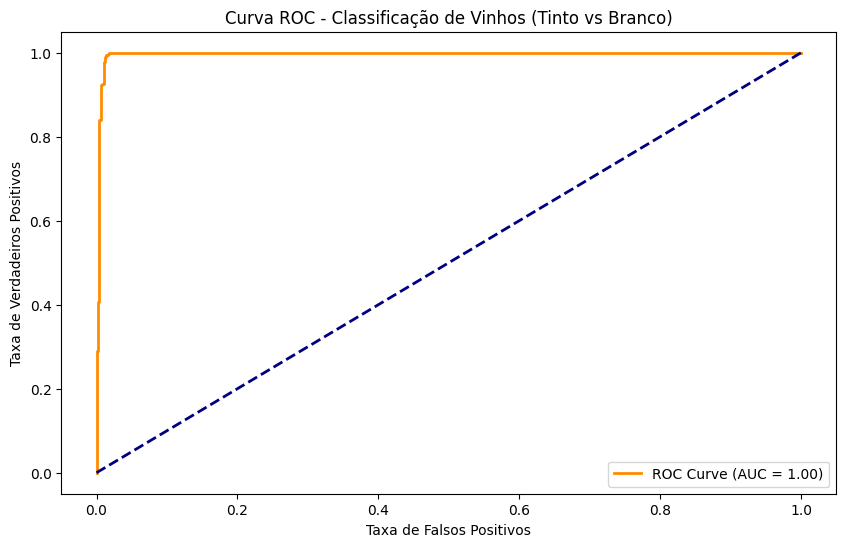

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Carregar datasets
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Adicionar coluna 'type' para identificar o tipo de vinho (0 = tinto, 1 = branco)
red_wine['type'] = 0
white_wine['type'] = 1

# Combinar os datasets
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Separar features (X) e target (y)
X = wine_data.drop('type', axis=1)
y = wine_data['type']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados (importante para SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar modelo SVM com kernel RBF (um kernel comum para problemas não lineares)
model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train, y_train)

# Relatórios de avaliação
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Curva ROC
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva (vinho branco)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Classificação de Vinhos (Tinto vs Branco)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 1. Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from kneed import KneeLocator

# 2. Carregar dados dos vinhos
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Adicionar coluna de tipo e unir os datasets
red_wine['tipo'] = 'tinto'
white_wine['tipo'] = 'branco'
df = pd.concat([red_wine, white_wine], ignore_index=True)

# 3. EDA básica
print(df.head())
print(df.describe())
print(df.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality   tipo  
0      9.4        5  tinto  
1      9.8        5  tinto  

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

Número ideal de clusters: 3
Silhouette Score: 0.399


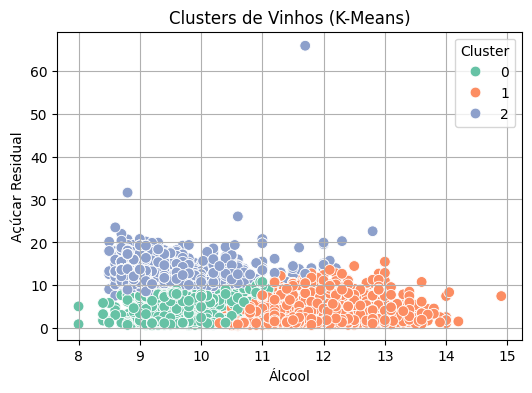

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

# 1. Carregar os dados
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# 2. Adicionar tipo de vinho e combinar
red_wine['tipo'] = 'tinto'
white_wine['tipo'] = 'branco'
df = pd.concat([red_wine, white_wine], ignore_index=True)

# 3. Seleção de variáveis
X = df[['alcohol', 'residual sugar', 'density']]

# 4. Escalonamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Método do Cotovelo
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)

kl = KneeLocator(range(1, 11), wss, curve='convex', direction='decreasing')
k_ideal = kl.elbow
print(f'Número ideal de clusters: {k_ideal}')

# 6. Aplicar K-Means
kmeans = KMeans(n_clusters=k_ideal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 7. Avaliação
silhouette = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette:.3f}")

# 8. Visualização (usando 2 variáveis)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='alcohol', y='residual sugar', hue='Cluster', palette='Set2', s=60)
plt.title('Clusters de Vinhos (K-Means)')
plt.xlabel('Álcool')
plt.ylabel('Açúcar Residual')
plt.grid(True)
plt.show()


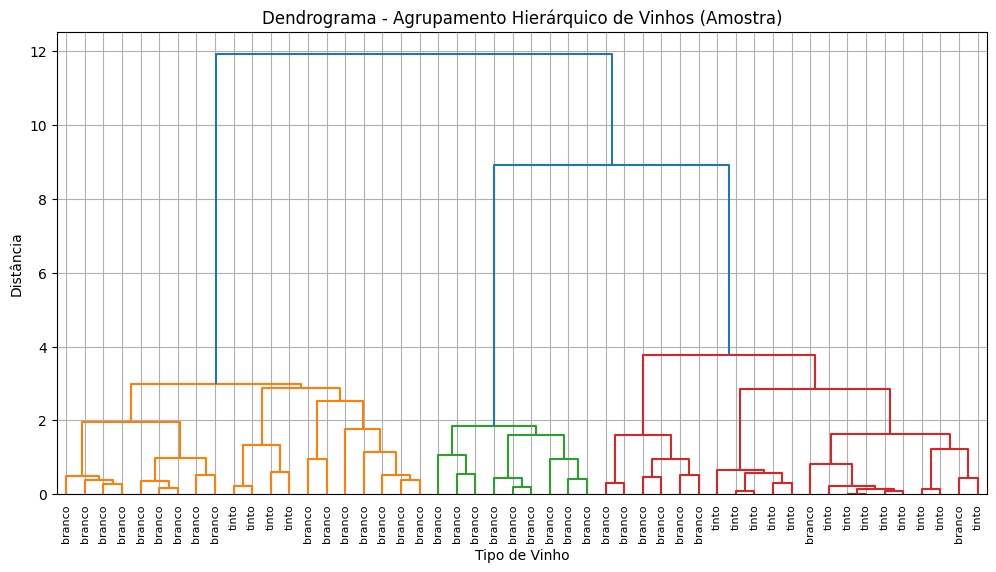

Silhouette Score: 0.329
      alcohol  residual sugar  density    tipo  Grupo
7        10.0             1.2  0.99460   tinto      1
5648     11.3             1.3  0.99058  branco      1
3992      9.6             1.5  0.99380  branco      2
5212      9.2            14.3  0.99800  branco      3
6050      9.5             7.7  0.99514  branco      3
3555      9.9             1.1  0.99370  branco      1
4515     12.7             3.1  0.98982  branco      1
6101     11.4             2.3  0.99140  branco      1
273       9.4             2.4  0.99735   tinto      2
4160      9.6            10.0  0.99696  branco      3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Carregando os datasets de vinho
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Adicionando uma coluna para identificar o tipo de vinho
red_wine['tipo'] = 'tinto'
white_wine['tipo'] = 'branco'

# Combinando os dois datasets
vinhos = pd.concat([red_wine, white_wine], ignore_index=True)

# Selecionando algumas colunas numéricas para o clustering
X = vinhos[['alcohol', 'residual sugar', 'density']]

# Selecionando uma amostra de 50 registros
amostra = vinhos.sample(50, random_state=42)
X_amostra = amostra[['alcohol', 'residual sugar', 'density']]

# Padronizando os dados da amostra
scaler = StandardScaler()
X_amostra_scaled = scaler.fit_transform(X_amostra)

# Criando o linkage com a amostra
linked = linkage(X_amostra_scaled, method='ward')

# Plotando o dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=amostra['tipo'].values,
           distance_sort='ascending',
           leaf_rotation=90)
plt.title('Dendrograma - Agrupamento Hierárquico de Vinhos (Amostra)')
plt.xlabel('Tipo de Vinho')
plt.ylabel('Distância')
plt.grid(True)
plt.show()

# (Opcional) Clustering com todos os dados
X_scaled = scaler.fit_transform(X)
linked_full = linkage(X_scaled, method='ward')
grupos = fcluster(linked_full, 3, criterion='maxclust')  # <-- LINHA CORRIGIDA
vinhos['Grupo'] = grupos

# Silhouette Score com todos os dados
score = silhouette_score(X_scaled, grupos)
print(f'Silhouette Score: {score:.3f}')

# Exibindo amostra dos resultados
print(vinhos[['alcohol', 'residual sugar', 'density', 'tipo', 'Grupo']].sample(10))


#DBSCAN - Density-Based Spatial Clustering of Applications with Noise

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

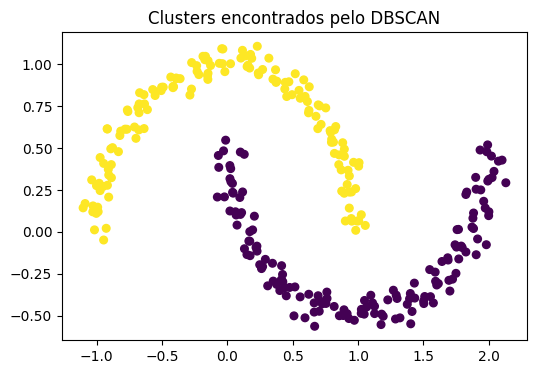

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd

# Leitura dos datasets
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Aplicar o DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualizar o resultado
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Clusters encontrados pelo DBSCAN")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(red_wine)  # ou white_wine, se preferir


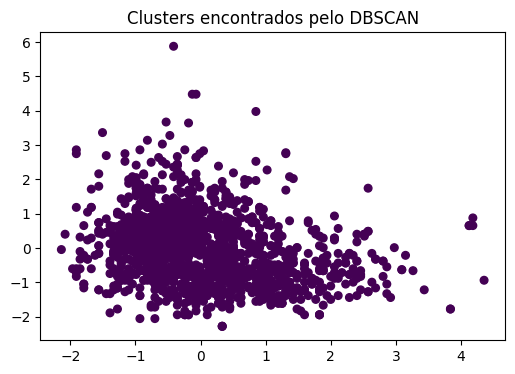

In [ ]:
# Aplicar o DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualizar o resultado
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Clusters encontrados pelo DBSCAN")
plt.show()


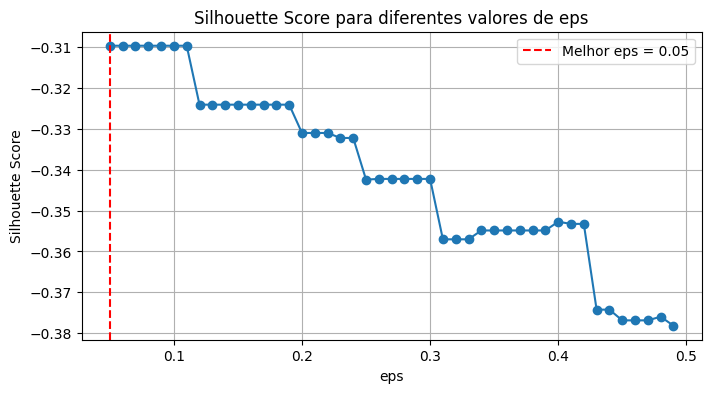

Melhor eps: 0.05 com Silhouette Score de -0.3096


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Carregando e preparando os dados
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

scaler = StandardScaler()
X = scaler.fit_transform(red_wine)  # <-- aqui definimos X corretamente

# Parâmetros fixos
min_samples = 4  # geralmente n_features + 1

# Testar vários valores de eps
eps_values = np.arange(0.05, 0.5, 0.01)
silhouette_scores = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)

    # DBSCAN pode rotular alguns como -1 (ruído), precisamos ao menos 2 clusters válidos
    if len(set(labels)) > 1 and len(set(labels)) < len(X):
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # caso inválido

# Encontrar o eps com maior score
best_eps = eps_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

# Mostrar gráfico
plt.figure(figsize=(8, 4))
plt.plot(eps_values, silhouette_scores, marker='o')
plt.axvline(best_eps, color='red', linestyle='--', label=f"Melhor eps = {best_eps:.2f}")
plt.title("Silhouette Score para diferentes valores de eps")
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid()
plt.show()

print(f"Melhor eps: {best_eps:.2f} com Silhouette Score de {best_score:.4f}")


#Exemplo Extra

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Carregando e preparando os dados
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Selecionando apenas duas características para simular as coordenadas (por exemplo, álcool e pH)
area1 = red_wine[['alcohol', 'pH']].values[:30]    # Primeiros 30 vinhos tintos
area2 = white_wine[['alcohol', 'pH']].values[:30]  # Primeiros 30 vinhos brancos
area3 = red_wine[['alcohol', 'pH']].values[30:60]  # Próximos 30 vinhos tintos

# Gerando outliers com valores extremos das características
outliers = np.random.uniform(
    low=[red_wine['alcohol'].min(), red_wine['pH'].min()],
    high=[red_wine['alcohol'].max(), red_wine['pH'].max()],
    size=(10, 2))

# Combinar tudo em um único array
localizacoes = np.vstack([area1, area2, area3, outliers])
df = pd.DataFrame(localizacoes, columns=["alcohol", "pH"])
df.head()

,alcohol,pH
0,9.4,3.51
1,9.8,3.20
2,9.8,3.26
3,9.8,3.16
4,9.4,3.51


In [ ]:
# Carregando e preparando os dados
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(red_wine)

# Aplicar DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
red_wine['cluster'] = db.fit_predict(X_scaled)

print(red_wine['cluster'].value_counts())


cluster
-1    1599
Name: count, dtype: int64


In [ ]:
# Carregando e preparando os dados
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(white_wine)

# Aplicar DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
white_wine['cluster'] = db.fit_predict(X_scaled)

print(white_wine['cluster'].value_counts())


cluster
-1     4797
 13       8
 9        8
 11       7
 4        7
 5        7
 10       6
 7        6
 2        6
 1        6
 0        5
 8        5
 3        5
 6        5
 12       5
 14       5
 15       5
 16       5
Name: count, dtype: int64


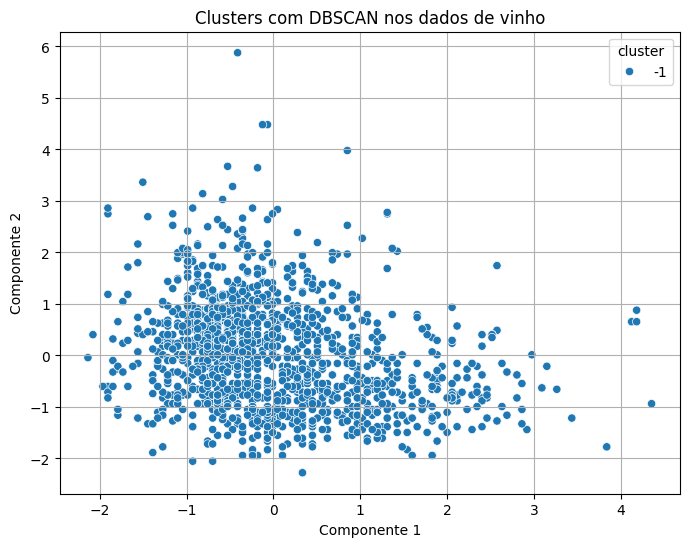

In [ ]:
import pandas as pd

df = pd.DataFrame(X[:, :2], columns=['x1', 'x2'])  # usa as duas primeiras features para visualização
df['cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', palette='tab10')
plt.title("Clusters com DBSCAN nos dados de vinho")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()


#OUTRA TENTATIVA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix,
                           roc_curve, auc, mean_absolute_error,
                           mean_squared_error, r2_score)

# Carregar dados
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Adicionar tipo de vinho
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combinar datasets
wines = pd.concat([red_wine, white_wine], ignore_index=True)
wines['type'] = wines['type'].map({'red': 0, 'white': 1})

# Verificar valores nulos
print(wines.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

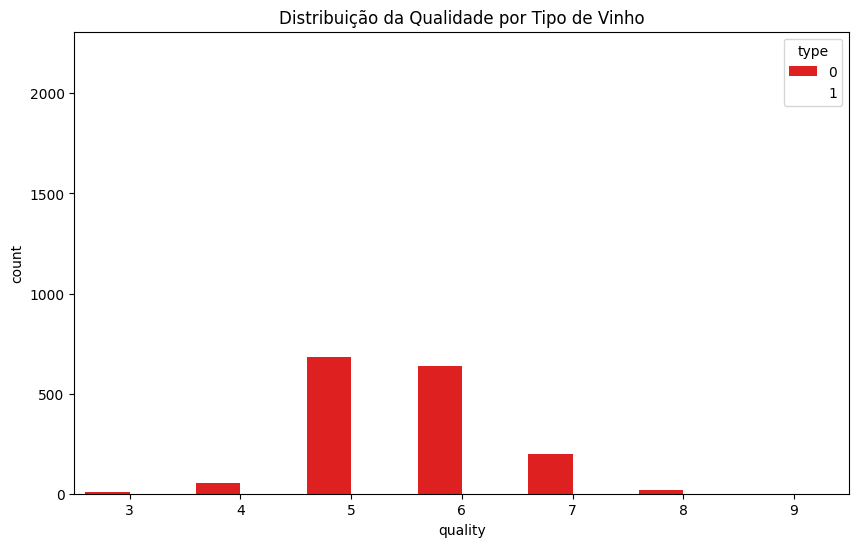

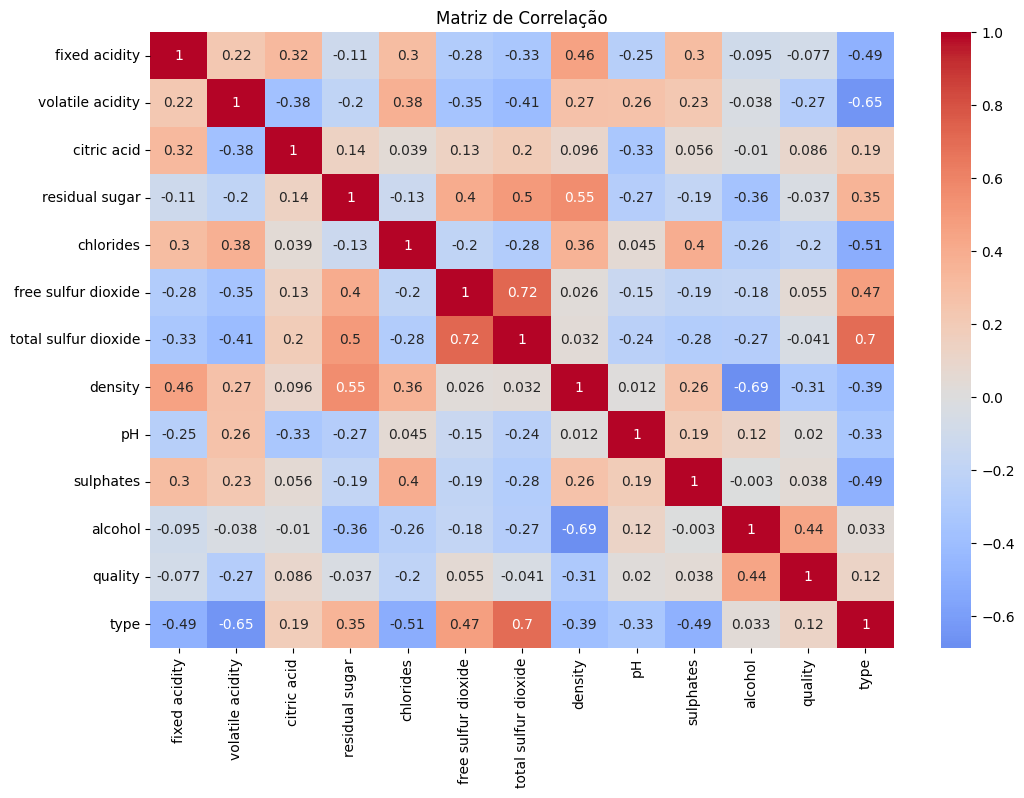

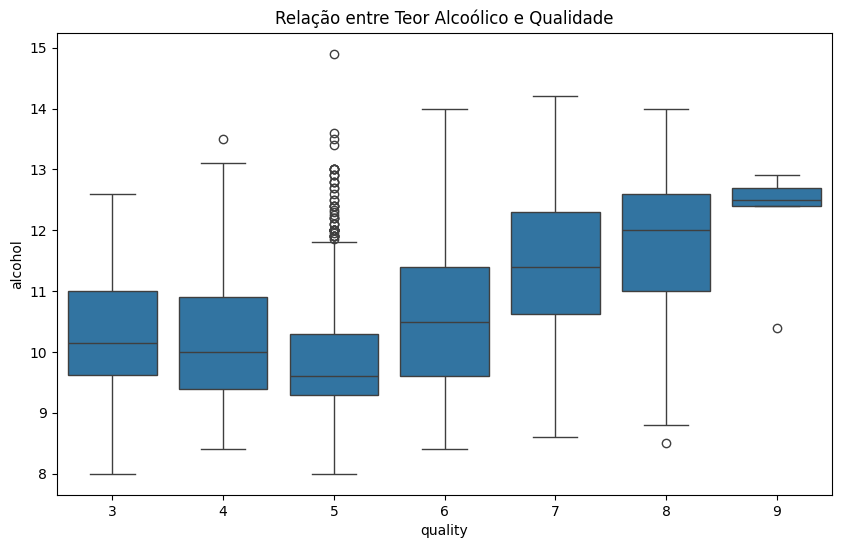

In [ ]:
# Estatísticas descritivas
print(wines.describe())

# Distribuição da qualidade
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wines, hue='type', palette=['red', 'white'])
plt.title('Distribuição da Qualidade por Tipo de Vinho')
plt.show()

# Correlações
plt.figure(figsize=(12, 8))
sns.heatmap(wines.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

# Relação entre álcool e qualidade
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wines)
plt.title('Relação entre Teor Alcoólico e Qualidade')
plt.show()

In [ ]:
# Criar variáveis alvo
# Para classificação
bins = [0, 4, 6, 10]
labels = ['baixa', 'média', 'alta']
wines['quality_class'] = pd.cut(wines['quality'], bins=bins, labels=labels)

# Para regressão (já existe a coluna 'quality')

# Separar features e targets
X = wines.drop(['quality', 'quality_class'], axis=1)
y_class = wines['quality_class']
y_reg = wines['quality']

# Dividir dados
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.3, random_state=42)
_, _, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)

# Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Inicializar modelos
class_models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Treinar e avaliar
results_class = {}
for name, model in class_models.items():
    model.fit(X_train_scaled, y_class_train)
    y_pred = model.predict(X_test_scaled)

    # Métricas
    accuracy = accuracy_score(y_class_test, y_pred)
    f1 = f1_score(y_class_test, y_pred, average='weighted')
    cm = confusion_matrix(y_class_test, y_pred)

    # Curva ROC (para multiclasse)
    y_proba = model.predict_proba(X_test_scaled)

    results_class[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Confusion Matrix': cm
    }

# Exibir resultados
for name, metrics in results_class.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['Accuracy']:.3f}")
    print(f"F1-Score: {metrics['F1-Score']:.3f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])


KNN:
Accuracy: 0.793
F1-Score: 0.779
Confusion Matrix:
[[ 184    0  181]
 [   4    8   66]
 [ 139   14 1354]]

Logistic Regression:
Accuracy: 0.791
F1-Score: 0.752
Confusion Matrix:
[[ 105    0  260]
 [   2    3   73]
 [  71    2 1434]]

Decision Tree:
Accuracy: 0.782
F1-Score: 0.784
Confusion Matrix:
[[ 224    2  139]
 [   5   19   54]
 [ 176   49 1282]]

Random Forest:
Accuracy: 0.850
F1-Score: 0.831
Confusion Matrix:
[[ 208    0  157]
 [   0    8   70]
 [  64    1 1442]]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Inicializar modelos
reg_models = {
    'Linear Regression': LinearRegression(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor()
}

# Treinar e avaliar
results_reg = {}
for name, model in reg_models.items():
    model.fit(X_train_scaled, y_reg_train)
    y_pred = model.predict(X_test_scaled)

    # Métricas
    mae = mean_absolute_error(y_reg_test, y_pred)
    mse = mean_squared_error(y_reg_test, y_pred)
    r2 = r2_score(y_reg_test, y_pred)

    results_reg[name] = {
        'MAE': mae,
        'MSE': mse,
        'R²': r2
    }

# Exibir resultados
for name, metrics in results_reg.items():
    print(f"\n{name}:")
    print(f"MAE: {metrics['MAE']:.3f}")
    print(f"MSE: {metrics['MSE']:.3f}")
    print(f"R²: {metrics['R²']:.3f}")


Linear Regression:
MAE: 0.562
MSE: 0.528
R²: 0.277

KNN Regression:
MAE: 0.525
MSE: 0.474
R²: 0.350

Decision Tree Regression:
MAE: 0.492
MSE: 0.707
R²: 0.031

Random Forest Regression:
MAE: 0.440
MSE: 0.368
R²: 0.496



🔍 Comparação Modelos de Classificação:
              Model  Accuracy  F1-Score
      Random Forest  0.850256  0.831364
                KNN  0.792821  0.779299
Logistic Regression  0.790769  0.752267
      Decision Tree  0.782051  0.783666

📊 Comparação Modelos de Regressão:
                   Model      MAE      MSE       R²
Random Forest Regression 0.439682 0.367508 0.496315
          KNN Regression 0.525128 0.473928 0.350463
       Linear Regression 0.562063 0.527638 0.276851
Decision Tree Regression 0.491795 0.707179 0.030783

🏆 Melhor modelo de classificação: Random Forest (Accuracy: 0.850)
🏆 Melhor modelo de regressão: Random Forest Regression (R²: 0.496)


<ipython-input-8-5f7c3af55c70>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df_class.sort_values('Accuracy'), palette='viridis')
<ipython-input-8-5f7c3af55c70>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R²', y='Model', data=df_reg.sort_values('R²'), palette='magma')


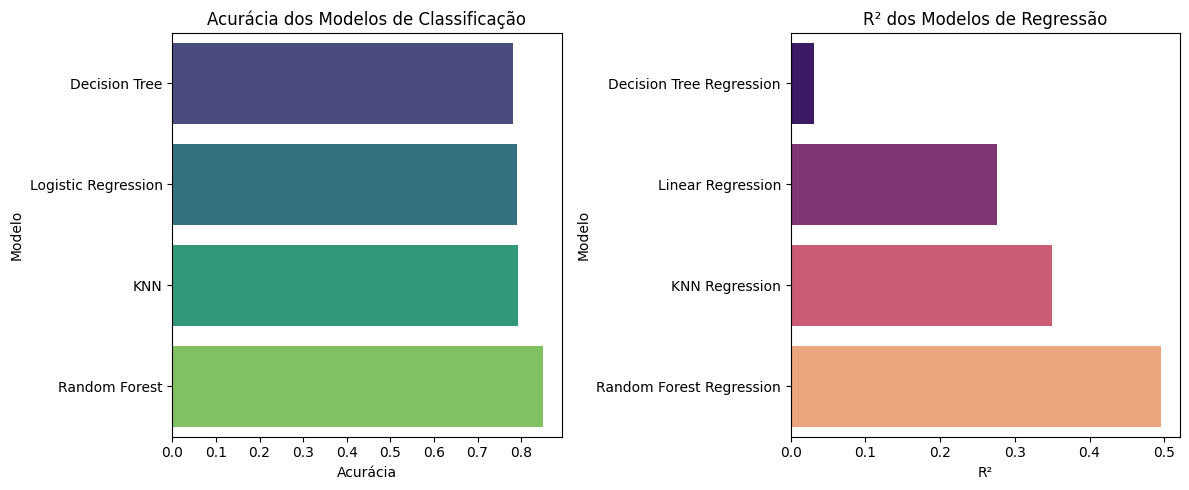

In [ ]:
# 6. Comparação e Seleção de Modelos (Versão Final Corrigida)

# Comparação Classificação
class_results = []
for model_name, metrics in results_class.items():
    class_results.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'F1-Score': metrics['F1-Score']
    })

df_class = pd.DataFrame(class_results)
print("\n🔍 Comparação Modelos de Classificação:")
print(df_class.sort_values('Accuracy', ascending=False).to_string(index=False))

# Comparação Regressão
reg_results = []
for model_name, metrics in results_reg.items():
    reg_results.append({
        'Model': model_name,
        'MAE': metrics['MAE'],
        'MSE': metrics['MSE'],
        'R²': metrics['R²']
    })

df_reg = pd.DataFrame(reg_results)
print("\n📊 Comparação Modelos de Regressão:")
print(df_reg.sort_values('R²', ascending=False).to_string(index=False))

# Selecionar melhores modelos de forma robusta
best_class_model = df_class.loc[df_class['Accuracy'].idxmax(), 'Model']
best_class_acc = df_class['Accuracy'].max()

best_reg_model = df_reg.loc[df_reg['R²'].idxmax(), 'Model']
best_reg_r2 = df_reg['R²'].max()

print(f"\n🏆 Melhor modelo de classificação: {best_class_model} (Accuracy: {best_class_acc:.3f})")
print(f"🏆 Melhor modelo de regressão: {best_reg_model} (R²: {best_reg_r2:.3f})")

# Adicionando visualização gráfica
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Accuracy', y='Model', data=df_class.sort_values('Accuracy'), palette='viridis')
plt.title('Acurácia dos Modelos de Classificação')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')

plt.subplot(1, 2, 2)
sns.barplot(x='R²', y='Model', data=df_reg.sort_values('R²'), palette='magma')
plt.title('R² dos Modelos de Regressão')
plt.xlabel('R²')
plt.ylabel('Modelo')

plt.tight_layout()
plt.show()

In [ ]:
# Salvar melhor modelo de classificação
from joblib import dump

best_class_model = RandomForestClassifier()
best_class_model.fit(X_train_scaled, y_class_train)
dump(best_class_model, 'melhor_modelo_classificacao.joblib')

# Salvar melhor modelo de regressão
best_reg_model = RandomForestRegressor()
best_reg_model.fit(X_train_scaled, y_reg_train)
dump(best_reg_model, 'melhor_modelo_regressao.joblib')

['melhor_modelo_regressao.joblib']